# Model Development

The objective is to build a model so as to get accurate predictions of price using one or the other features of the car price and the data from the car price dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#### Creating a linear regression object.

In [2]:
df = pd.read_csv("clean_df.csv")
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [3]:
x = df[['highway-mpg']]
y = df[['price']]

Fitting linear model using highway-mpg :

In [4]:
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting the price values using the highway-mpg values of the dataset itself 

In [5]:
Yhat = lm.predict(x)
Yhat[0:5]

array([[16254.26934067],
       [17077.0977727 ],
       [13785.78404458],
       [20368.41150083],
       [17899.92620473]])

In [6]:
lm.intercept_

array([38470.6370055])

In [7]:
lm.coef_

array([[-822.82843203]])

In [8]:
df

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,city-mpg,highway-mpg,price,highway-L/100km,city-L/100km,normalized-height,normalized-width,normalized-length,horsepower-binned,price-binned
0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,21,27,16500.0,8.703704,11.190476,0.816054,0.890278,0.811148,Low,Low
1,1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,...,19,26,16500.0,9.038462,12.368421,0.876254,0.909722,0.822681,Medium,Low
2,2,2,164.0,audi,gas,std,four,sedan,fwd,front,...,24,30,13950.0,7.833333,9.791667,0.908027,0.919444,0.848630,Low,Low
3,3,2,164.0,audi,gas,std,four,sedan,4wd,front,...,18,22,17450.0,10.681818,13.055556,0.908027,0.922222,0.848630,Low,Low
4,4,2,122.0,audi,gas,std,two,sedan,fwd,front,...,19,25,15250.0,9.400000,12.368421,0.887960,0.920833,0.851994,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,23,28,16845.0,8.392857,10.217391,0.928094,0.956944,0.907256,Low,Low
196,196,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,19,25,19045.0,9.400000,12.368421,0.928094,0.955556,0.907256,Medium,Medium
197,197,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,18,23,21485.0,10.217391,13.055556,0.928094,0.956944,0.907256,Medium,Medium
198,198,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,...,26,27,22470.0,8.703704,9.038462,0.928094,0.956944,0.907256,Low,Medium


###  Creating another Linear Regression model based on engine-size

In [9]:
X1 = df[['engine-size']]
Y1 = df['price']
lm1 = LinearRegression()
lm1.fit(X1, Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
lm1.coef_ , lm.intercept_

(array([166.8621392]), array([38470.6370055]))

In [14]:
Yhat = lm1.predict(X1)[0:5]
Yhat

array([13729.63711709, 17400.60417954, 10225.53219385, 14730.80995231,
       14730.80995231])

### Creating a multiple linear regression model

We found out during exploratory data analysis that there are multiple features that can help predict price as they had a good correlation score.
The features were horsepower, curb-weight, engine-size, highway-mpg.
Developing a model based on that.

In [15]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fitting the linear model using the variables

In [16]:
lm2 = LinearRegression()
lm2.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
lm2.intercept_ , lm2.coef_

(-15807.307965154318,
 array([53.59649869,  4.70573919, 81.48768427, 36.12867113]))

# Model Evaluation

### Residual plot

Creating a residual plot between highway-mpg and price to check the variance of the two variables

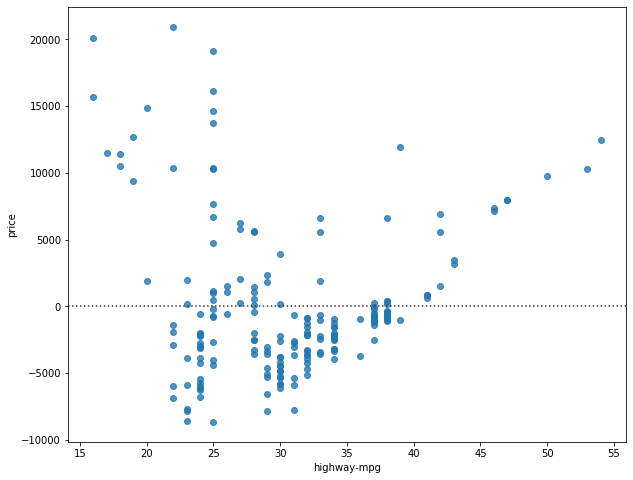

In [22]:
import seaborn as sns
width = 10
height = 8
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])